In [30]:
# last modified 2024/4/24 
# %matplotlib ipympl
%matplotlib inline
import h5py 
import glob
from scipy import signal
import os
import datetime
import matplotlib
import logging
import csv
import time
def concat(flist , start = 0 , span = 20  ):
    datalist = []
    for fname in flist[ start : start + span ]:
        data = dp.read_das(fname)
        datalist.append(data)

    data = np.concatenate(datalist, axis = 1)
    utc_datetime = datetime.datetime.strptime(flist[start][-22 : -7],'%Y%m%d_%H%M%S') + datetime.timedelta(hours=+8)
    utc_day = utc_datetime.strftime("%m-%d %H:%M")
    print("cat")
    return data , utc_datetime, utc_day 


def psd(startn,endn):
    # 创建一个dataset
    span_each_pic = 10 #12h -> 50min
    concat_time = 0
    psd_time = 0
    all_start = time.time()

    ch_list = [20*i for i in range(148)]
    for n in range(startn, endn):
        data , utc_datetime, utc_day = concat(flist , start= span_each_pic * n ,span= span_each_pic)
        nfft = 30000
        fs = 2000
        start = time.time()


        for i in range(len(ch_list)):
            with h5py.File('../output/DAS/psd_5_11/test2_ch'+str(ch_list[i])+'.hdf5', 'a') as f:
                # g =  f.create_group(str(ch_list[i]))  
                [f1,Pxx1] = signal.welch(data[i],                   # 随机信号
                                nfft=nfft,               # 每个窗的长度
                                fs=fs,                   # 采样频率   
                                # detrend='mean',          # 去掉均值
                                window=np.hanning(nfft), # 加汉尼窗
                                noverlap=int(nfft*3/4),  # 每个窗重叠75%的数据
                                )        # 求单边谱
                # print(f1)
                f.create_dataset(str(utc_day),  data=Pxx1 , chunks=len(Pxx1))
                f.close()

        concat_time +=  time.time() -start
        all_time = time.time() -all_start
        print(n , "psd运行时间:%.2f min %d s"%( int(concat_time / 60) , concat_time%60)+"/ all :%.2f min %d s"%( int(all_time / 60) , all_time%60) , utc_day, "check in ")

flist = glob.glob('../../czyc/test3/*357.h5')
flist.sort()
print(flist[0] ,flist[-1])

# path = '../output/DAS/psd_5_11/'
# if not os.path.exists(path):
#     os.makedirs(path)

# print(int(len(flist)/10))

# flist = flist[:]

# psd(startn=642 , endn=667) #10 chunk 14min 
# #642-1204 psd运行时间:157.00 min 1 s/ all :617.00 min 50 s 01-01 20:45 check in 

# 537

../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240103_140512.357.h5 ../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240105_061712.357.h5


log
5.9 周四 罗老师和袁师兄
1.das Hz time 在30 40 50道 1.5晚上0-9点 低频部分有类似多普勒效应的能量，可以做stft放大清晰度。实现提示：十倍十倍地放大缩小窗长 以提高清晰度，重叠50%，
2.das Hz time 在30 40 50道 能量暴增前期  有一个有类似多普勒效应的能量，可以做stft放大清晰度。实现提示：十倍十倍地放大缩小窗长 以提高清晰度，重叠50%，

3.psd 主要是反应平稳信号 去掉噪声
4. 740道有局部异常，1.5 8-10点的信号有暴增，可以往前多画几天看看是否是规律人类活动，但是发现传播方向既不是

In [1]:
import DasBatch as db
import glob
import os

# flist = glob.glob('../../czyc/test3/*357.h5')
# flist.sort()
# print(len(flist))

# path = '../output/DAS/stft_5_12/'
# if not os.path.exists(path):
#     os.makedirs(path)

# index_start =flist.index('../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_070012.357.h5')
# index_end =flist.index('../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_160012.357.h5')
# print(flist[0] , index_start , index_end)

# # index_end =flist.index('../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240105_010012.357.h5')

# span_each_pic = 20
# print(index_start,index_end )

# ch_list = [20+i for i in range(40)]
# db.das_time2ch(flist , ch_list , 
#                index_start ,  index_end  ,step= 10 , 
#                save_path= "../output/DAS/das_as_channel_5_14/test3_ch ") #大概30min


flist = glob.glob('../output/DAS/das_as_channel_5_14/test3_ch*')
flist.sort()
print(len(flist))

path = "../output/DAS/das_as_channel_5_14/fig9/"
if not os.path.exists(path):
    os.makedirs(path)


# db.cal_and_show_stft(flist= flist ,
#                   title = "czyc",
#                   save_path = path,
#                   fs=1000 ,  nperseg= 1024 , overlap= 512) #大概

db.cal_and_show_stft_split(flist= flist[9::3] ,
                  title = "czyc",
                  save_path = "../output/DAS/das_as_channel_5_14/fig11_300-400hz/",
                  split = 18,
                  figsize0= [30,12],
                  fs=1000 ,  nperseg= 1024*6, overlap= 512*6) #大概


40
test3_ch 29   (617, 21092) (432,)
运行时间 all :0.00 min 30 s
test3_ch 32   (617, 21092) (432,)
运行时间 all :0.00 min 58 s
test3_ch 35   (617, 21092) (432,)
运行时间 all :1.00 min 28 s
test3_ch 38   (617, 21092) (432,)
运行时间 all :1.00 min 59 s
test3_ch 41   (617, 21092) (432,)
运行时间 all :2.00 min 31 s
test3_ch 44   (617, 21092) (432,)
运行时间 all :3.00 min 2 s
test3_ch 47   (617, 21092) (432,)
运行时间 all :3.00 min 31 s
test3_ch 50   (617, 21092) (432,)
运行时间 all :4.00 min 2 s
test3_ch 53   (617, 21092) (432,)
运行时间 all :4.00 min 31 s
test3_ch 56   (617, 21092) (432,)
运行时间 all :5.00 min 3 s
test3_ch 59   (617, 21092) (432,)
运行时间 all :5.00 min 33 s


分析 730道的能量暴增,把690道 - 780道 的数据展成一维，再做stft

In [1]:
import DasBatch as db
import glob
import os

# flist = glob.glob('../../czyc/test3/*357.h5')
# flist.sort()
# print(len(flist))

# path = '../output/DAS/stft_5_12/'
# if not os.path.exists(path):
#     os.makedirs(path)

# index_start =flist.index('../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_070012.357.h5')
# index_end =flist.index('../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240104_160012.357.h5')
# print(flist[0] , index_start , index_end)

# # index_end =flist.index('../../czyc/test3/czyc_3km_GL_10m_frq_1kHz_sp_2m_UTC_20240105_010012.357.h5')

# span_each_pic = 20
# print(index_start,index_end )

# ch_list = [690+i*3 for i in range(30)]
# db.das_time2ch(flist , ch_list , 
#                index_start ,  len(flist)  ,step= 10 , 
#                save_path= "../output/DAS/das_as_channel_6_7/test3_ch ") #大概30min


flist = glob.glob('../output/DAS/das_as_channel_6_7/test3_ch*')
flist.sort()
print(len(flist))

path = "../output/DAS/das_as_channel_6_7/fig0_100hz/"
if not os.path.exists(path):
    os.makedirs(path)


# db.cal_and_show_stft(flist= flist ,
#                   title = "czyc",
#                   save_path = path,
#                   fs=1000 ,  nperseg= 1024 , overlap= 512) #大概

db.cal_and_show_stft_split(flist= flist[10::] ,
                  title = "czyc",
                  save_path = path,
                  split = 18,
                  figsize0= [15,6],
                  hp = 0.2 ,
                  fs=1000 ,  nperseg= 1024*10, overlap= 512*16) #大概


31
test3_ch 717   (1026, 40925) (559,)
运行时间 all :0.00 min 26 s
test3_ch 720   (1026, 40925) (559,)
运行时间 all :1.00 min 21 s
test3_ch 723   (1026, 40925) (559,)
运行时间 all :2.00 min 15 s
test3_ch 726   (1026, 40925) (559,)
运行时间 all :3.00 min 6 s
test3_ch 729   (1026, 40925) (559,)
运行时间 all :4.00 min 0 s
test3_ch 732   (1026, 40925) (559,)
运行时间 all :4.00 min 50 s
test3_ch 735   (1026, 40925) (559,)
运行时间 all :5.00 min 45 s
test3_ch 738   (1026, 40925) (559,)
运行时间 all :7.00 min 19 s
test3_ch 741   (1026, 40925) (559,)
运行时间 all :8.00 min 41 s
test3_ch 744   (1026, 40925) (559,)
运行时间 all :9.00 min 42 s
test3_ch 747   (1026, 40925) (559,)
运行时间 all :10.00 min 32 s
test3_ch 750   (1026, 40925) (559,)
运行时间 all :11.00 min 26 s


: 

: 

In [50]:
import DasBatch as db
db.channel_2_wav(flist=["../output/DAS/das_as_channel_5_14/test3_ch 26.hdf5"],
              start_time='2024-01-05 01:07:42',
              end_time='2024-01-05 01:37:42',
              fs= 150000,
              save_path= "../output/DAS/das_as_channel_5_14/wav/")   

['2024-01-04 15:00:12', '2024-01-04 15:02:42', '2024-01-04 15:05:12', '2024-01-04 15:07:42', '2024-01-04 15:10:12', '2024-01-04 15:12:42', '2024-01-04 15:15:12', '2024-01-04 15:17:42']


一些需要关注的
从hdf5中读取需要看看是分通道保存还是分时间保存，
计算时选取整10分钟的点位开始，计算时长也要符合，以方便画图
其次，作图时应该考虑分天数画图，如果超过36小时


In [24]:
import DasBatch as db

fs = 1000
db.channel_chunk_show_psd_Hz_time_split(psd_path='../output/DAS/psd_5_12/test2_ch',
                 ch_list = range(1200,1841,20),
                 frequencise=[fs/4],
                 timeshift="12-30 21:55",
                 save_path='../output/DAS/psd_5_12/fig2/' ,
                 split=2,
                 title= "czyc test2 nfft = 30000")


fs = 1000
db.channel_chunk_show_psd_Hz_time_split(psd_path='../output/DAS/psd_5_11/test2_ch',
                 ch_list = range(1200,1841,20),
                 frequencise=[fs/4],
                #  timeshift="12-30 21:55",
                 save_path='../output/DAS/psd_5_11/fig3/' ,
                 split=2,
                 title= "czyc test2 ")

-----------read 1200 ------------
(667, 15001)
(667, 7502)
-----------read 1220 ------------
(667, 15001)
(667, 7502)
-----------read 1240 ------------
(667, 15001)
(667, 7502)
-----------read 1260 ------------
(667, 15001)
(667, 7502)
-----------read 1280 ------------
(667, 15001)
(667, 7502)
-----------read 1300 ------------
(667, 15001)
(667, 7502)
-----------read 1320 ------------
(667, 15001)
(667, 7502)
-----------read 1340 ------------
(667, 15001)
(667, 7502)
-----------read 1360 ------------
(667, 15001)
(667, 7502)
-----------read 1380 ------------
(667, 15001)
(667, 7502)
-----------read 1400 ------------
(667, 15001)
(667, 7502)
-----------read 1420 ------------
(667, 15001)
(667, 7502)
-----------read 1440 ------------
(667, 15001)
(667, 7502)
-----------read 1460 ------------
(667, 15001)
(667, 7502)
-----------read 1480 ------------
(667, 15001)
(667, 7502)
-----------read 1500 ------------
(667, 15001)
(667, 7502)
-----------read 1520 ------------
(667, 15001)
(667, 750

In [ ]:
# import DasBatch as db
# path = '../output/DAS/stft_5_12/fig/'
# if not os.path.exists(path):
#     os.makedirs(path)

# flist = glob.glob('../output/DAS/stft_5_12/test3_ch*.hdf5')
# flist.sort()
# print(len(flist))
# db.show_stft_time(flist=flist , 
#                ft='../output/DAS/stft_5_12/test3_ft.hdf5',
#                ch_list= range(0,2941 , 20) ,
#                start_time= " " , 
#                end_time=" " , 
#                title= "czyc test2  ",
#                save_path=path)

5.21   hi，有个新的想法。把创智云城psd做一个傅里叶反变换，就是自相关函数。然后画出来自相关函数随通道变化的热度图，可以试试能不能看地下结构信息

15.213335197397157 6807.352077456585
(148, 15000)


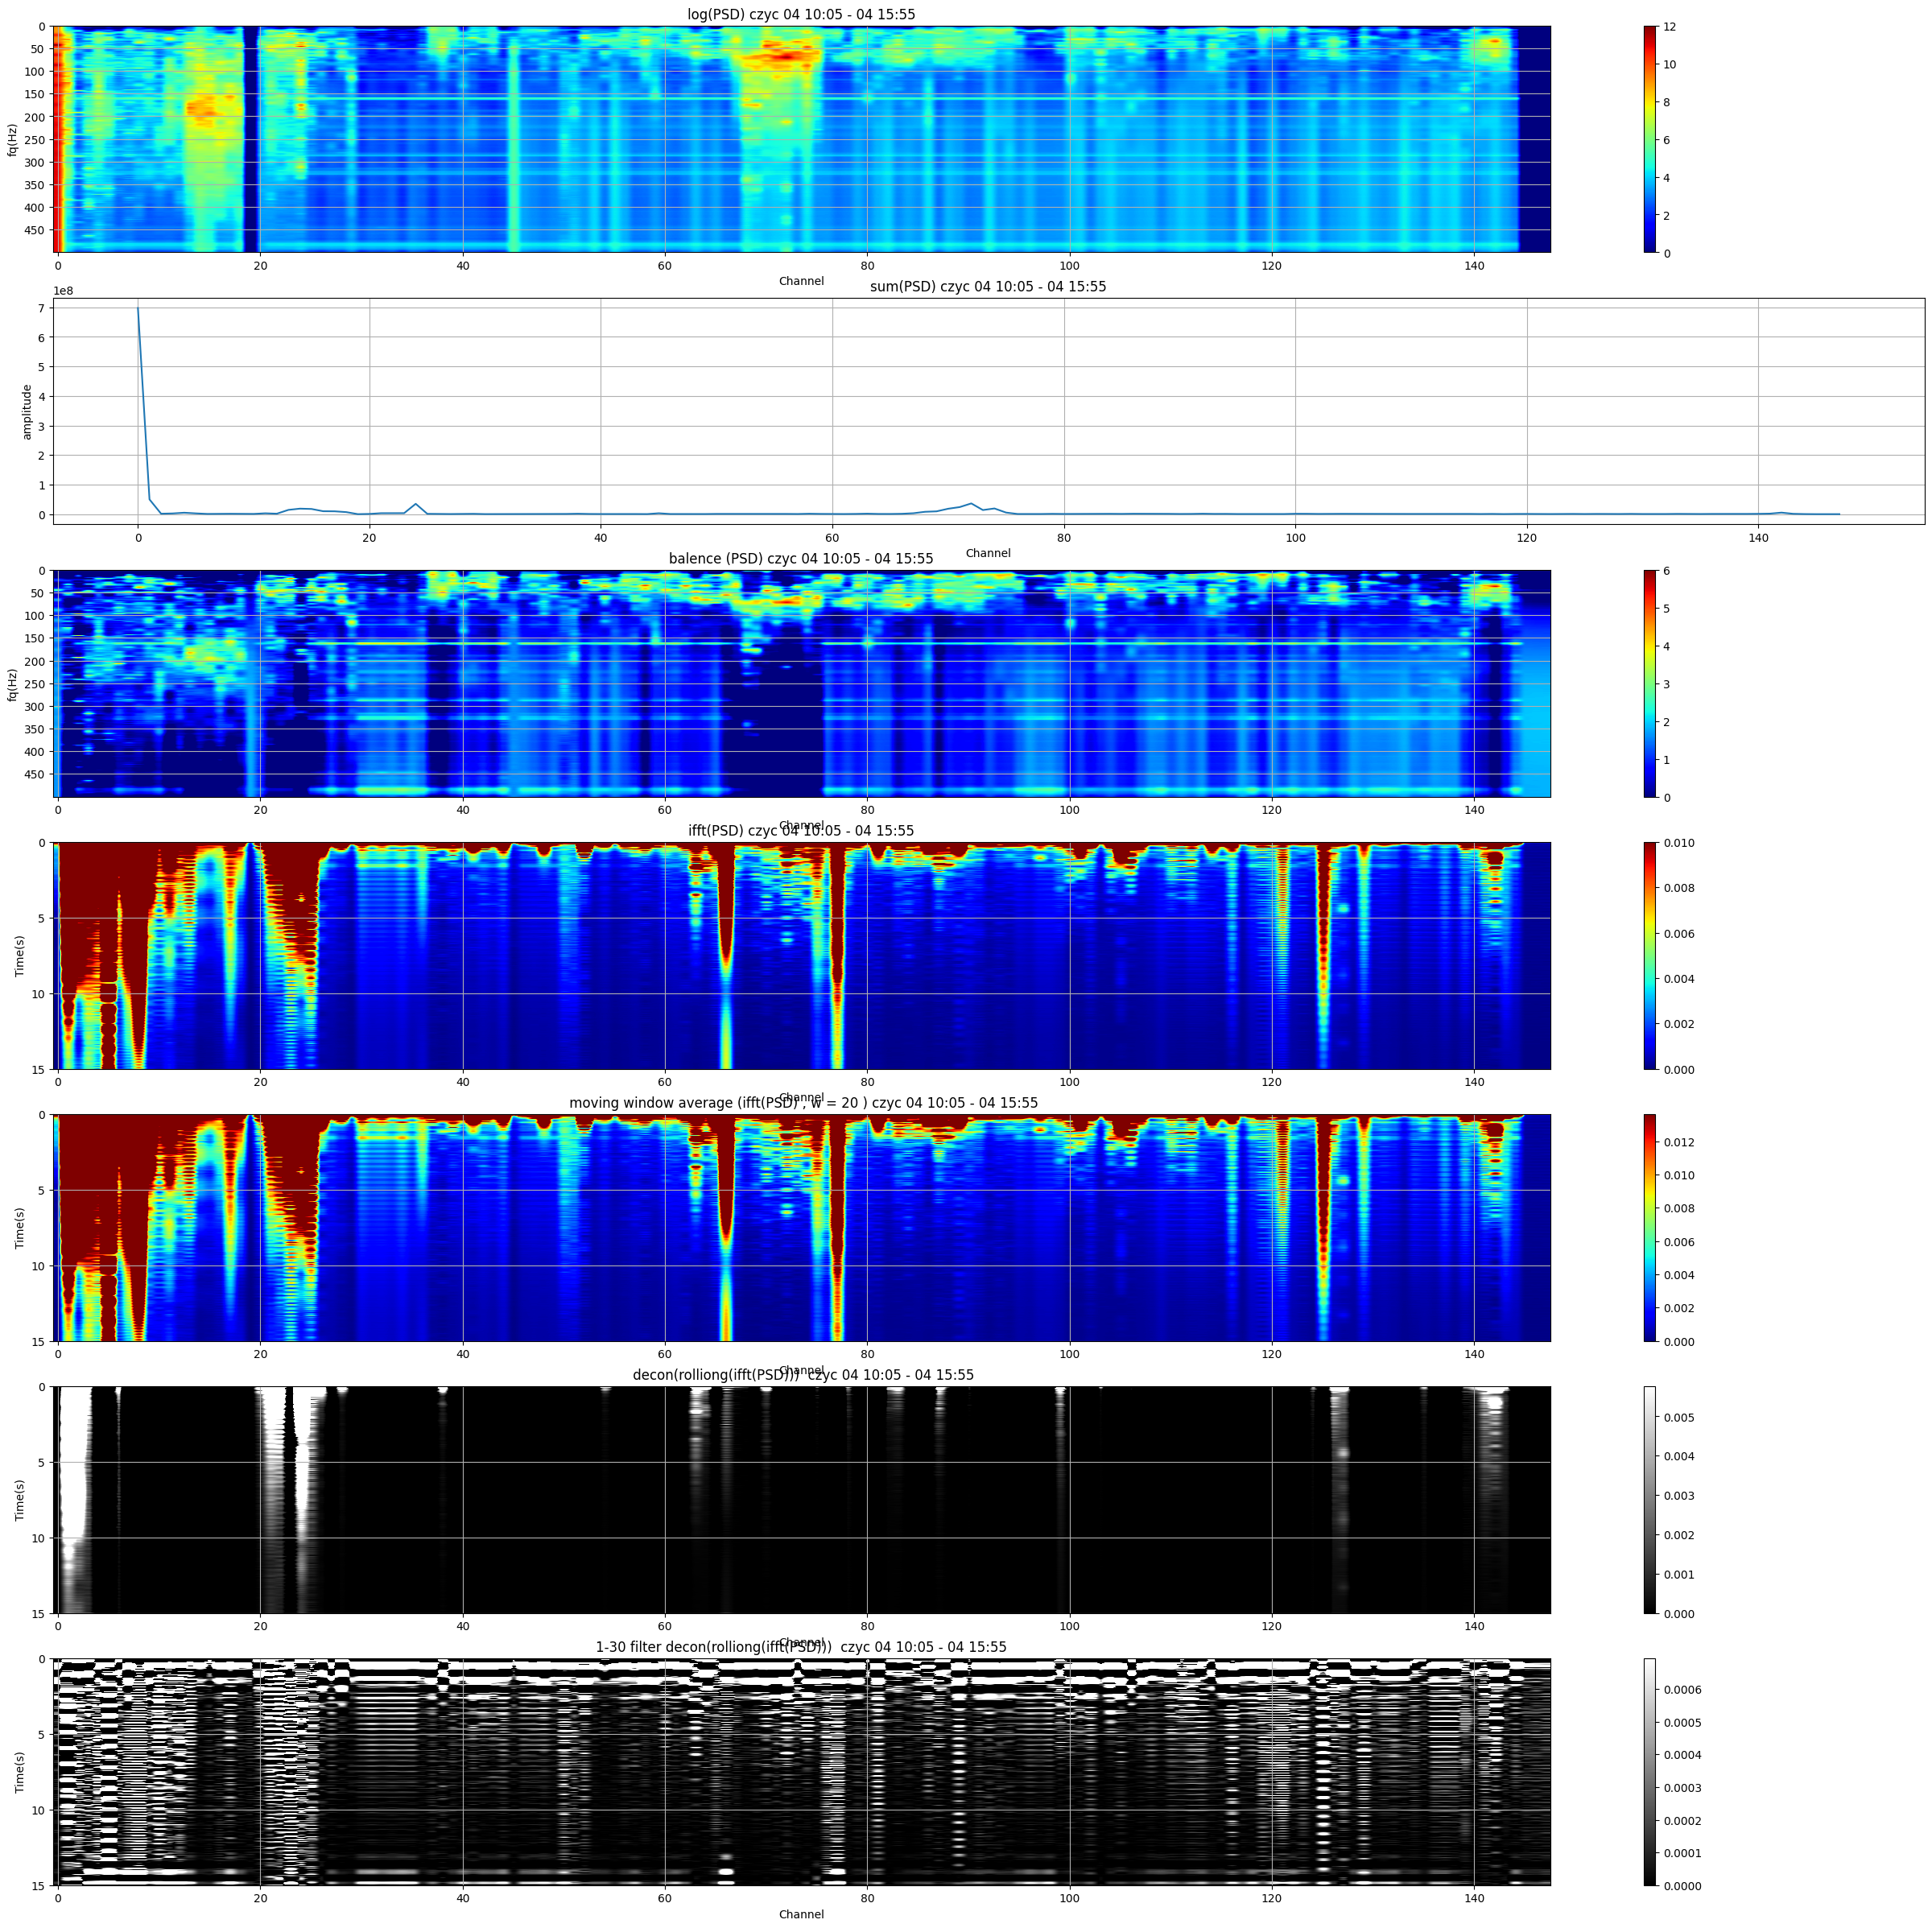

In [11]:
import h5py 
import numpy as np
import matplotlib.pyplot as plt
import os
import DasBatch as db
from DasTools import DasPrep as dp
import scipy


db.show_ifft_time_range_amtitude_channel(['../output/DAS/psd_4_25_3.hdf5'] , ch_list = range(0,1479,10) , frequencise=[500] , 
                                         dis_spacing=2 , title=" czyc " , save_path='../output/DAS/ifft_5_22/')

自相关的结果参考这个文章的图3c，目标是看到波形里的侧向变化


用自相关看声音和das的相关性
之前用psd看得出来两者的 0-300hz的频谱很像，所以可以先降采样到 0-400hz
在做相干性分析
